In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

52.973091887122905 87.24587915398854
53.07219188253819 -157.00831813847932
14.625019782692831 -85.44762561586538
-38.11825774057097 -113.28814856492221
-40.479652191161776 -26.09950059994233
46.55031073944076 23.027137566379736
83.67265935023516 -74.45817747863185
-55.57013381220334 98.93753169766006
88.82385404330162 -94.03280122062017
-54.16888509073963 -142.25201553693628
57.93324327253251 148.67734266528612
-80.5980809206509 97.80719819067559
-0.49254605684984654 35.673706039753256
10.025882942013311 83.89703485093139
-0.966879779720486 -25.669281926065878
-35.46121734880561 -0.8835004775398829
45.91104841575614 -177.58060076335371
-37.30623913431812 -112.07079422308551
69.33818297898148 -78.99993727361075
-43.1785268230413 -55.96648853557197
84.07332926390191 91.99185190947696
-39.84331761490768 -4.413599348459911
-27.44769645565288 13.44033920488198
40.40510219278437 99.65236550071069
8.721325807727169 44.619763753241955
47.40432770254321 122.91459489760871
-89.74250897675867 -19

-84.82178232960146 11.768644664615437
86.03606574860768 65.3616780284423
-70.40945982758191 56.99383532167735
-62.59574150585858 15.277783832365458
-39.278918000185215 -118.57795299774412
73.61534453389777 -33.730877680254935
-37.83003313640497 -15.110128775782357
-76.3328035603439 142.82974168158785
-4.008163627308036 -168.5612918687198
47.67225156237217 -32.060014174086064
21.32655867361008 -84.93372233942061
32.99055166446972 82.78658877273114
80.99032559427187 139.03157562353005
-60.62064075366734 -88.88633997287118
32.725875723686485 -35.44931910590705
0.7250087435195667 25.449173178290152
-11.183322763989139 -172.44910094760286
31.65314913732516 105.47826824478801
-64.40975831527629 26.85328119531445
-65.3492953970772 163.22016396457894
-38.42525056069894 63.1062702749154
30.050379694709235 109.86227974284736
-65.79231783550318 151.1329206253023
85.42117202558774 -73.03206133764027
-35.07979201600018 -162.52870945408856
3.529162142667033 -144.6364618325835
16.589126669358592 -40.

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

635

In [7]:
import os
import requests
from dotenv import load_dotenv
load_dotenv()
weather_api_key = os.getenv("weather_api_key")
print(type(weather_api_key))

<class 'str'>


In [8]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#print(url)

In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kaz
Processing Record 2 of Set 1 | kodiak
Processing Record 3 of Set 1 | san jose de rio tinto
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | arraial do cabo
Processing Record 6 of Set 1 | belis
Processing Record 7 of Set 1 | qaanaaq
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | arman
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | molo
Processing Record 13 of Set 1 | trincomalee
Processing Record 14 of Set 1 | touros
Processing Record 15 of Set 1 | luderitz
Processing Record 16 of Set 1 | provideniya
Processing Record 17 of Set 1 | clyde river
Processing Record 18 of Set 1 | necochea
Processing Record 19 of Set 1 | talnakh
Processing Record 20 of Set 1 | saldanha
Processing Record 21 of Set 1 | jiuquan
Processing Record 22 of Set 1 | odweyne
Processing Record 23 of Set 1 | nianzishan
P

Processing Record 40 of Set 4 | saint-philippe
Processing Record 41 of Set 4 | kikwit
Processing Record 42 of Set 4 | vengerovo
Processing Record 43 of Set 4 | fujin
Processing Record 44 of Set 4 | victoria
Processing Record 45 of Set 4 | loreto
Processing Record 46 of Set 4 | hihifo
City not found. Skipping...
Processing Record 47 of Set 4 | strezhevoy
Processing Record 48 of Set 4 | surovatikha
Processing Record 49 of Set 4 | bourail
Processing Record 50 of Set 4 | khatanga
Processing Record 1 of Set 5 | galesong
Processing Record 2 of Set 5 | edd
Processing Record 3 of Set 5 | samarai
Processing Record 4 of Set 5 | kavieng
Processing Record 5 of Set 5 | tsihombe
City not found. Skipping...
Processing Record 6 of Set 5 | naze
Processing Record 7 of Set 5 | pilar do sul
Processing Record 8 of Set 5 | shasta lake
Processing Record 9 of Set 5 | saint george
Processing Record 10 of Set 5 | emporia
Processing Record 11 of Set 5 | torbay
Processing Record 12 of Set 5 | chuy
Processing Reco

Processing Record 30 of Set 8 | sept-iles
Processing Record 31 of Set 8 | vite
Processing Record 32 of Set 8 | carauari
Processing Record 33 of Set 8 | mayumba
Processing Record 34 of Set 8 | atambua
Processing Record 35 of Set 8 | san patricio
Processing Record 36 of Set 8 | puri
Processing Record 37 of Set 8 | plouzane
Processing Record 38 of Set 8 | salinas
Processing Record 39 of Set 8 | polignano a mare
Processing Record 40 of Set 8 | port hedland
Processing Record 41 of Set 8 | novo aripuana
Processing Record 42 of Set 8 | syracuse
Processing Record 43 of Set 8 | marcona
City not found. Skipping...
Processing Record 44 of Set 8 | uzunkopru
City not found. Skipping...
Processing Record 45 of Set 8 | port lincoln
Processing Record 46 of Set 8 | wajima
Processing Record 47 of Set 8 | kapoeta
Processing Record 48 of Set 8 | san rafael
Processing Record 49 of Set 8 | dauphin
Processing Record 50 of Set 8 | vila velha
Processing Record 1 of Set 9 | tumannyy
City not found. Skipping...


Processing Record 18 of Set 12 | enshi
Processing Record 19 of Set 12 | swift current
Processing Record 20 of Set 12 | aitape
Processing Record 21 of Set 12 | conceicao do mato dentro
Processing Record 22 of Set 12 | ayan
Processing Record 23 of Set 12 | gasa
Processing Record 24 of Set 12 | sarai naurang
Processing Record 25 of Set 12 | baiyin
Processing Record 26 of Set 12 | dzhusaly
City not found. Skipping...
Processing Record 27 of Set 12 | portland
Processing Record 28 of Set 12 | porkhov
Processing Record 29 of Set 12 | victor harbor
Processing Record 30 of Set 12 | taikang
Processing Record 31 of Set 12 | mastic beach
Processing Record 32 of Set 12 | jieshi
Processing Record 33 of Set 12 | praya
Processing Record 34 of Set 12 | chillicothe
Processing Record 35 of Set 12 | santo angelo
Processing Record 36 of Set 12 | creston
Processing Record 37 of Set 12 | radaseni
Processing Record 38 of Set 12 | humberto de campos
Processing Record 39 of Set 12 | caraquet
Processing Record 4

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kaz,52.9113,87.3105,55.22,72,93,3.71,RU,2022-07-28 21:49:20
1,Kodiak,57.7900,-152.4072,62.11,55,0,5.75,US,2022-07-28 21:49:20
2,San Jose De Rio Tinto,14.9333,-85.7000,94.57,58,89,4.79,HN,2022-07-28 21:49:21
3,Rikitea,-23.1203,-134.9692,73.47,72,76,21.59,PF,2022-07-28 21:46:48
4,Arraial Do Cabo,-22.9661,-42.0278,75.06,60,0,8.05,BR,2022-07-28 21:49:22
5,Belis,46.6500,23.0333,62.55,60,84,2.26,RO,2022-07-28 21:49:22
6,Qaanaaq,77.4840,-69.3632,41.47,67,13,3.13,GL,2022-07-28 21:48:01
7,Busselton,-33.6500,115.3333,58.51,71,100,15.70,AU,2022-07-28 21:47:59
8,Mataura,-46.1927,168.8643,47.48,96,85,2.66,NZ,2022-07-28 21:46:31
9,Arman,59.7000,150.1667,53.02,96,100,4.47,RU,2022-07-28 21:49:23


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [13]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kaz,RU,2022-07-28 21:49:20,52.9113,87.3105,55.22,72,93,3.71
1,Kodiak,US,2022-07-28 21:49:20,57.7900,-152.4072,62.11,55,0,5.75
2,San Jose De Rio Tinto,HN,2022-07-28 21:49:21,14.9333,-85.7000,94.57,58,89,4.79
3,Rikitea,PF,2022-07-28 21:46:48,-23.1203,-134.9692,73.47,72,76,21.59
4,Arraial Do Cabo,BR,2022-07-28 21:49:22,-22.9661,-42.0278,75.06,60,0,8.05
...,...,...,...,...,...,...,...,...,...
584,Lingao,CN,2022-07-28 22:05:47,19.9103,109.6859,79.74,83,53,4.03
585,Zaysan,KZ,2022-07-28 22:05:47,47.4667,84.8667,74.41,44,69,13.09
586,Mount Isa,AU,2022-07-28 22:05:48,-20.7333,139.5000,55.17,35,1,8.05
587,Riyadh,SA,2022-07-28 22:01:30,24.6877,46.7219,88.03,36,100,7.34


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [16]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1659046017.360981

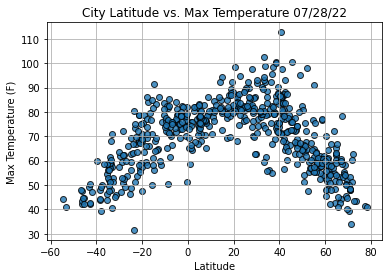

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

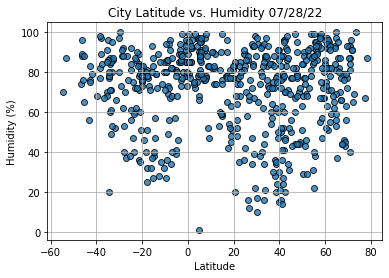

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

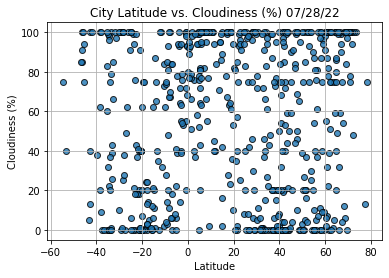

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

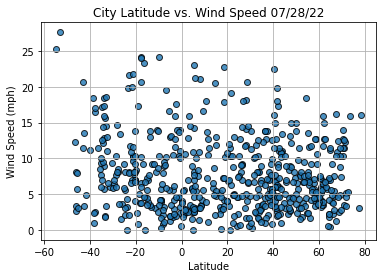

In [24]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [34]:
#!pip install scipy
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [38]:
index13 = city_data_df.loc[13]
index13

City                       Touros
Country                        BR
Date          2022-07-28 21:49:25
Lat                       -5.1989
Lng                      -35.4608
Max Temp                    76.37
Humidity                       81
Cloudiness                      6
Wind Speed                   13.0
Name: 13, dtype: object

In [39]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kaz,RU,2022-07-28 21:49:20,52.9113,87.3105,55.22,72,93,3.71
1,Kodiak,US,2022-07-28 21:49:20,57.7900,-152.4072,62.11,55,0,5.75
2,San Jose De Rio Tinto,HN,2022-07-28 21:49:21,14.9333,-85.7000,94.57,58,89,4.79
5,Belis,RO,2022-07-28 21:49:22,46.6500,23.0333,62.55,60,84,2.26
6,Qaanaaq,GL,2022-07-28 21:48:01,77.4840,-69.3632,41.47,67,13,3.13


In [40]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

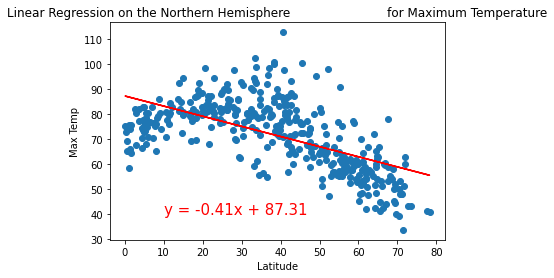

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

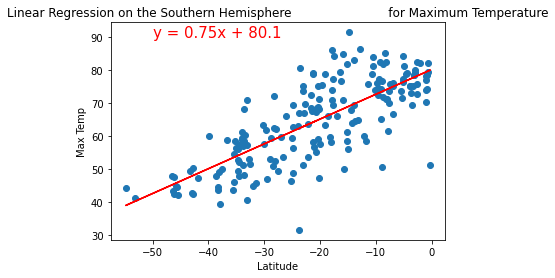

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

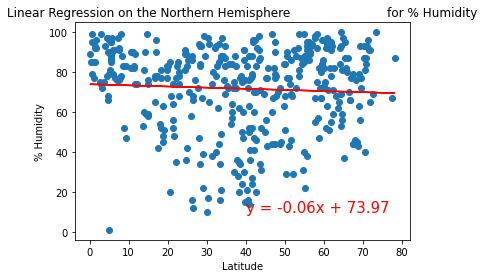

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

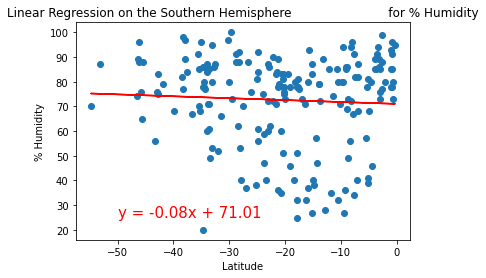

In [50]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,25))

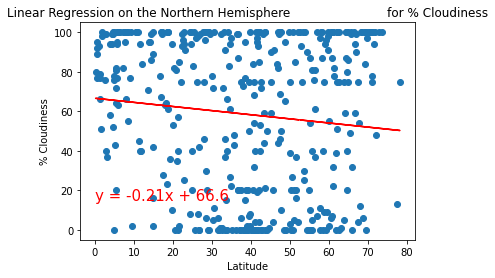

In [54]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness', (0,15))

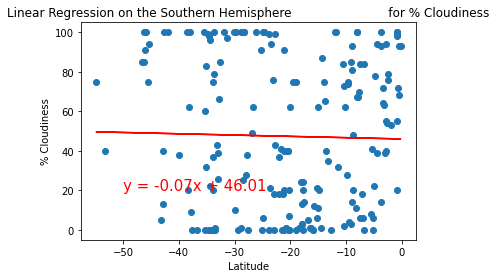

In [56]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,20))

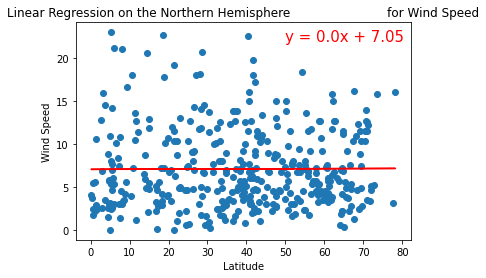

In [59]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(50,22))

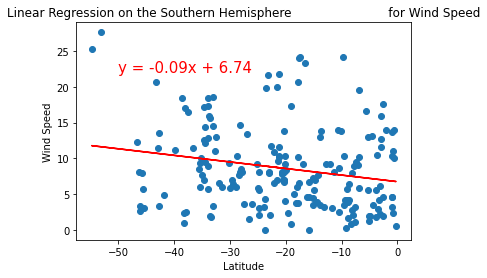

In [61]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,22))